# VV7 lágmörkun rosenbrock fallsins


## 1

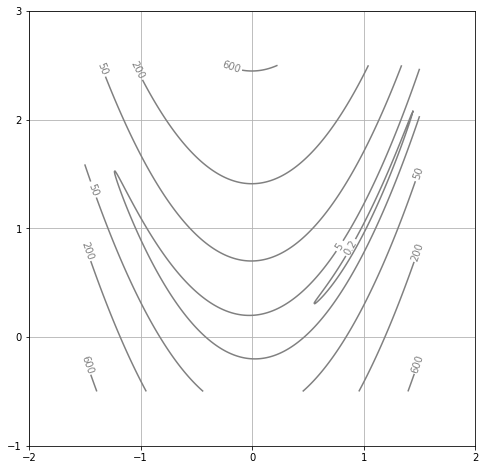

24.199999999999996
0


In [7]:
import matplotlib.pyplot as plt
import numpy as np


def rosen(x):
    res = (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2
    return res


plt.figure(figsize=(8, 8))
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-0.5, 2.5, 400)
[X, Y] = np.meshgrid(x, y)
Z = rosen([X, Y])
levels = [0.2, 5, 50] + list(range(200, 2300, 400))
c = plt.contour(X, Y, Z, levels=levels, colors="gray")
levstr = {l: str(l) for l in levels}
plt.clabel(c, fmt=levstr)
plt.xticks(range(-2, 3))
plt.yticks(range(-1, 4))
plt.grid("True")
plt.show()
print(rosen((-1.2, 1)))
print(rosen((1, 1)))


## 2

In [8]:
import scipy.optimize as opt

result = opt.minimize(rosen, (-1.2, 1))
xmin = result.x
print(result)


      fun: 2.154544078116627e-11
 hess_inv: array([[0.50998325, 1.02085757],
       [1.02085757, 2.04855586]])
      jac: array([ 4.10630637e-06, -2.21341048e-06])
  message: 'Optimization terminated successfully.'
     nfev: 117
      nit: 32
     njev: 39
   status: 0
  success: True
        x: array([0.99999536, 0.99999071])


til að lesa úr svarinu er hentugt að vita að 𝑟𝑜𝑠𝑒𝑛((1, 1)) skilar núlli. xmin er sá vigur sem er næstur
(1, 1) án þess að skila núlli. svarið inniheldur samt meira en bara xmin, inniheldur líka hes mikið
af öðrum upplýsingum

## 3

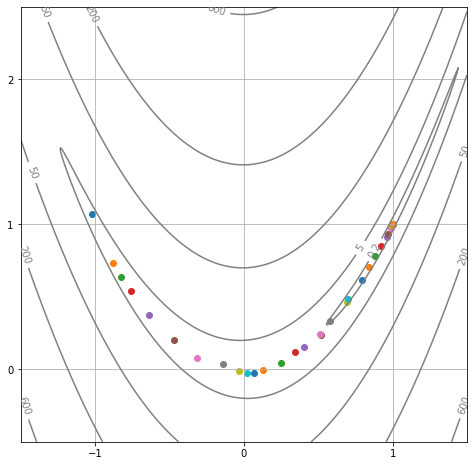

In [9]:
plt.figure(figsize=(8, 8))
x = np.linspace(-1.5, 1.5, 400)
y = np.linspace(-0.5, 2.5, 400)
[X, Y] = np.meshgrid(x, y)
Z = rosen([X, Y])
levels = [0.2, 5, 50] + list(range(200, 2300, 400))
c = plt.contour(X, Y, Z, levels=levels, colors="gray")
levstr = {l: str(l) for l in levels}
plt.clabel(c, fmt=levstr)
plt.xticks(range(-2, 3))
plt.yticks(range(-1, 4))
plt.grid("True")


def cb(x):
    plt.scatter(x[0], x[1])


opt.minimize(rosen, (-1.2, 1), callback=cb)
plt.show()

## 4

In [10]:
x = (-1.2, 1)
results = []
results.append(opt.minimize(rosen, x))
results.append(opt.minimize(rosen, x, method="L-BFGS-B"))
results.append(opt.minimize(rosen, x, method="CG"))
results.append(opt.minimize(rosen, x, method="Powell"))
print(f"nit | nfev | xmin")
for i in results:
    print(f" {i.nit}  | {i.nfev} | {i.x}")


nit | nfev | xmin
 32  | 117 | [0.99999536 0.99999071]
 36  | 132 | [0.99999616 0.99999242]
 37  | 280 | [0.99999678 0.99999355]
 23  | 665 | [1. 1.]


## 5

In [11]:
def rosg(x, y):
    hlutX = -2 * (1 - x) - 400 * x * (y - x**2)
    hlutY = 200 * (y - x**2)
    return np.array([hlutX, hlutY])


print(rosg(-1.2, 1))
print(rosg(1, 1))


[-215.6  -88. ]
[0 0]
